In [1]:
import numpy as np
import pandas as pd,gc

#Advance-style plotting
import seaborn as sns
color =sns.color_palette()
sns.set_style('darkgrid')

from matplotlib import pyplot as plt

In [2]:
train =pd.read_csv("train.csv")
test =pd.read_csv("test.csv");test.head()

,Previous_SB_Wins,Number_Of_Wins_This_Season,Number_Of_First_Round_Draft_Picks,Team_Value,Playing_Style,Average_Player_Age,Number_Of_Injured_Players,Coach_Experience_Level,ID
0,3,16,2,Above_Four_Billion,Relaxed,26,two,Intermediate,1
1,2,15,3,Less_Than_Four_Billion,Balanced,26,six,Advanced,5
2,2,10,1,Less_Than_Four_Billion,Balanced,27,nine,Beginner,6
3,3,14,3,Less_Than_Four_Billion,Balanced,26,seven,Intermediate,7
4,3,13,2,Less_Than_Four_Billion,Balanced,27,three,Intermediate,9


In [3]:
train['Number_Of_First_Round_Draft_Picks'].value_counts()

2    4118
3    1653
1     694
4      29
0       6
Name: Number_Of_First_Round_Draft_Picks, dtype: int64

In [4]:
test['Playing_Style'].unique()

array(['Relaxed', 'Balanced', 'Aggressive_Defense', 'Aggressive_Offense'],
      dtype=object)

In [5]:
train['past_cup/current_win'] = train['Number_Of_Wins_This_Season'] + train['Previous_SB_Wins']
test['past_cup/current_win'] = test['Number_Of_Wins_This_Season'] + test['Previous_SB_Wins']

In [6]:
test['games_left'] = 32 - test['Number_Of_Wins_This_Season']
train['games_left'] = 32 - train['Number_Of_Wins_This_Season']

In [7]:
def rx(test):
    if test['Number_Of_First_Round_Draft_Picks'] == 0 :
        return 'might_not_win'
    else:
        return 'may_win'
test['Round_Draft_class'] = test.apply(lambda test:rx(test), axis=1)

In [8]:
def rx(train):
    if train['Number_Of_First_Round_Draft_Picks'] == 0 :
        return 'might_not_win'
    else:
        return 'may_win'
train['Round_Draft_class'] = train.apply(lambda train:rx(train), axis=1)

In [9]:
train.head()

,Won_Championship,Previous_SB_Wins,Number_Of_Wins_This_Season,Number_Of_First_Round_Draft_Picks,Team_Value,Playing_Style,Average_Player_Age,Number_Of_Injured_Players,Coach_Experience_Level,ID,past_cup/current_win,games_left,Round_Draft_class
0,0,3,13,2,Less_Than_Four_Billion,Balanced,27,five,Intermediate,6056,16,19,may_win
1,0,2,14,2,Less_Than_Four_Billion,Aggressive_Offense,26,five,Intermediate,9702,16,18,may_win
2,1,2,13,1,Less_Than_Four_Billion,Aggressive_Defense,27,four,Intermediate,1745,15,19,may_win
3,0,2,12,2,Above_Four_Billion,Balanced,27,six,Intermediate,4757,14,20,may_win
4,0,1,15,2,Less_Than_Four_Billion,Balanced,26,five,Intermediate,7242,16,17,may_win


In [10]:
train.drop([807 , 1467,2664,3486, 3836 ,5409] ,axis=False)

,Won_Championship,Previous_SB_Wins,Number_Of_Wins_This_Season,Number_Of_First_Round_Draft_Picks,Team_Value,Playing_Style,Average_Player_Age,Number_Of_Injured_Players,Coach_Experience_Level,ID,past_cup/current_win,games_left,Round_Draft_class
0,0,3,13,2,Less_Than_Four_Billion,Balanced,27,five,Intermediate,6056,16,19,may_win
1,0,2,14,2,Less_Than_Four_Billion,Aggressive_Offense,26,five,Intermediate,9702,16,18,may_win
2,1,2,13,1,Less_Than_Four_Billion,Aggressive_Defense,27,four,Intermediate,1745,15,19,may_win
3,0,2,12,2,Above_Four_Billion,Balanced,27,six,Intermediate,4757,14,20,may_win
4,0,1,15,2,Less_Than_Four_Billion,Balanced,26,five,Intermediate,7242,16,17,may_win
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6495,0,1,14,2,Less_Than_Four_Billion,Aggressive_Defense,26,three,Intermediate,5568,15,18,may_win
6496,1,2,14,3,Less_Than_Four_Billion,Aggressive_Defense,27,seven,Intermediate,8301,16,18,may_win
6497,1,1,14,2,Less_Than_Four_Billion,Aggressive_Defense,27,five,Intermediate,2532,15,18,may_win
6498,0,1,14,2,Above_Four_Billion,Aggressive_Defense,26,six,Intermediate,6345,15,18,may_win


In [11]:
train.isnull().sum()

Won_Championship                     0
Previous_SB_Wins                     0
Number_Of_Wins_This_Season           0
Number_Of_First_Round_Draft_Picks    0
Team_Value                           0
Playing_Style                        0
Average_Player_Age                   0
Number_Of_Injured_Players            0
Coach_Experience_Level               0
ID                                   0
past_cup/current_win                 0
games_left                           0
Round_Draft_class                    0
dtype: int64

In [12]:
train['Team_Value'].unique()

array(['Less_Than_Four_Billion', 'Above_Four_Billion',
       'Less_Than_Three_Billion'], dtype=object)

In [13]:
test.drop(['ID'], axis=1, inplace=True)
train.drop(['ID'], axis=1, inplace=True)

In [14]:
test.dtypes

Previous_SB_Wins                      int64
Number_Of_Wins_This_Season            int64
Number_Of_First_Round_Draft_Picks     int64
Team_Value                           object
Playing_Style                        object
Average_Player_Age                    int64
Number_Of_Injured_Players            object
Coach_Experience_Level               object
past_cup/current_win                  int64
games_left                            int64
Round_Draft_class                    object
dtype: object

In [15]:
## Compare_train_test_column

for col in ['Number_Of_Injured_Players', 'Number_Of_Injured_Players','Coach_Experience_Level','Team_Value']:
    train_col = train[col].unique()
    test_col = test[col].unique()
    
    print ('Not in Test ' + col + ' ',[i  for i in train_col if i not in test_col])
    print ('Not in Train ' + col + ' ',[i  for i in test_col  if i not in train_col])
    print('==' * 18)

Not in Test Number_Of_Injured_Players  []
Not in Train Number_Of_Injured_Players  []
Not in Test Number_Of_Injured_Players  []
Not in Train Number_Of_Injured_Players  []
Not in Test Coach_Experience_Level  []
Not in Train Coach_Experience_Level  []
Not in Test Team_Value  []
Not in Train Team_Value  []


In [16]:
#categorical and numerical columns into variables
num_col = train.select_dtypes(include=np.number).columns
cat_col = train.select_dtypes(exclude=np.number).columns

In [17]:
num_col

Index(['Won_Championship', 'Previous_SB_Wins', 'Number_Of_Wins_This_Season',
       'Number_Of_First_Round_Draft_Picks', 'Average_Player_Age',
       'past_cup/current_win', 'games_left'],
      dtype='object')

In [18]:
cat_col 

Index(['Team_Value', 'Playing_Style', 'Number_Of_Injured_Players',
       'Coach_Experience_Level', 'Round_Draft_class'],
      dtype='object')

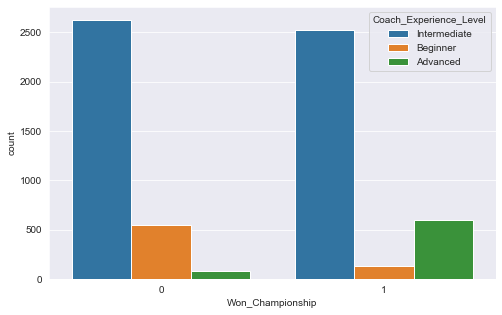

In [19]:
plt.figure(figsize=[8,5])
sns.countplot(x= 'Won_Championship', hue ='Coach_Experience_Level', data=train)

In [20]:
# 1 LABEL ENCODING

def encode_LE(train,test,cols,verbose=True):
    for col in cols:
        df_comb = pd.concat([train[col],test[col]],axis=0)
        df_comb,_ = df_comb.factorize(sort=True)
        nm = col
        if df_comb.max()>32000: 
            train[nm] = df_comb[:len(train)].astype('int32')
            test[nm] = df_comb[len(train):].astype('int32')
        else:
            train[nm] = df_comb[:len(train)].astype('int16')
            test[nm] = df_comb[len(train):].astype('int16')
        del df_comb; x=gc.collect()
        if verbose: print(nm,', ',end='')
            
            
# 2 FREQUENCY ENCODING

def encode_FE(train, test, cols, normalize = True, ext_train = None, ext_test= None):
    norm = normalize
    for col in cols:
        if ext_train is None:
            df = pd.concat([train[col],test[col]])
            nm = col+'_FE'
        else:
            df = pd.concat([ext_train[col],ext_test[col]])
            nm = "rejected"+"_"+ col +"_FE" 
        vc = df.value_counts(dropna=True, normalize=norm).to_dict()
        vc[-1] = -1
        train[nm] = train[col].map(vc)
        train[nm] = train[nm].astype('float32')
        test[nm] = test[col].map(vc)
        test[nm] = test[nm].astype('float32')
        train[nm].fillna(-999,inplace=True)
        test[nm].fillna(-999,inplace=True)
                
        del df; x=gc.collect()
        print(nm,', ',end='')

        

# 3 ADVANCE ENCODING
        
def encode_AG__2(group ,main_columns, aggregations, train_df=train, test_df=test, ext_src=None,
              fillna=True, usena=False):
    # AGGREGATION OF MAIN WITH UID FOR GIVEN STATISTICS
    for main_column in main_columns:  
            for agg_type in aggregations:
                if ext_src is None: 
                    temp_df = pd.concat([train_df[group +[main_column]], test_df[group +[main_column]]])
                    new_col_name = group[0]+"_"+group[1]+"_"+main_column+'_'+agg_type
                                    
                else:
                    temp_df = ext_src.copy()
                    new_col_name = "ext_data"+ "_"+group[0]+"_"+group[1]+"_"+main_column+'_'+agg_type
                    
                if usena: temp_df.loc[temp_df[main_column]==-1,main_column] = np.nan
                temp_df = temp_df.groupby(group)[main_column].agg([agg_type]).reset_index(level=group).rename(
                                                        columns={agg_type: new_col_name})
                
                


                train_df[new_col_name] = pd.merge(train_df, temp_df, on=group, how='left')[new_col_name].astype('float32')
                test_df[new_col_name]  = pd.merge(test_df, temp_df, on=group, how='left')[new_col_name].astype('float32')
                
                if fillna:
                    train_df[new_col_name].fillna(-1,inplace=True)
                    test_df[new_col_name].fillna(-1,inplace=True)
                
                print("'"+new_col_name+"'",', ',end='')
                
                
                
# 4 GROUP AGGREGATION MEAN AND STD

def encode_AG(uids ,main_columns, aggregations, train_df=train, test_df=test, ext_src=None,
              fillna=True, usena=False):
    # AGGREGATION OF MAIN WITH UID FOR GIVEN STATISTICS
    for main_column in main_columns:  
        for col in uids:
            for agg_type in aggregations:
                if ext_src is None: 
                    temp_df = pd.concat([train_df[[col, main_column]], test_df[[col,main_column]]])
                    new_col_name = main_column+'_'+col+'_'+agg_type
                                    
                else:
                    temp_df = ext_src.copy()
                    new_col_name = "ext_data"+ "_"+main_column+'_'+col+'_'+agg_type

                if usena: temp_df.loc[temp_df[main_column]==-1,main_column] = np.nan
                temp_df = temp_df.groupby([col])[main_column].agg([agg_type]).reset_index().rename(
                                                        columns={agg_type: new_col_name})

                temp_df.index = list(temp_df[col])
                temp_df = temp_df[new_col_name].to_dict()   

                train_df[new_col_name] = train_df[col].map(temp_df).astype('float32')
                test_df[new_col_name]  = test_df[col].map(temp_df).astype('float32')
                
                if fillna:
                    train_df[new_col_name].fillna(-1,inplace=True)
                    test_df[new_col_name].fillna(-1,inplace=True)
                
                print("'"+new_col_name+"'",', ',end='')
                
                
# 5 COMBINE FEATURES

def encode_CB(col1,col2,df1=train,df2=test):
    nm = col1+'_'+col2
    df1[nm] = df1[col1].astype(str)+'_'+df1[col2].astype(str)
    df2[nm] = df2[col1].astype(str)+'_'+df2[col2].astype(str) 
    print(nm,', ',end='')
    
    
# 6 GROUP AGGREGATION NUNIQUE

def encode_AG2( uids,main_columns, train_df=train, test_df=test):
    for main_column in main_columns:  
        for col in uids:
            comb = pd.concat([train_df[[col]+[main_column]],test_df[[col]+[main_column]]],axis=0)
            mp = comb.groupby(col)[main_column].agg(['nunique'])['nunique'].to_dict()
            train_df[col+'_'+main_column+'_ct'] = train_df[col].map(mp).astype('float32')
            test_df[col+'_'+main_column+'_ct'] = test_df[col].map(mp).astype('float32')
            print(col+'_'+main_column+'_ct, ',end='')

In [21]:
#encode_LE(train,test,cat_col )

In [22]:
train.head()

,Won_Championship,Previous_SB_Wins,Number_Of_Wins_This_Season,Number_Of_First_Round_Draft_Picks,Team_Value,Playing_Style,Average_Player_Age,Number_Of_Injured_Players,Coach_Experience_Level,past_cup/current_win,games_left,Round_Draft_class
0,0,3,13,2,Less_Than_Four_Billion,Balanced,27,five,Intermediate,16,19,may_win
1,0,2,14,2,Less_Than_Four_Billion,Aggressive_Offense,26,five,Intermediate,16,18,may_win
2,1,2,13,1,Less_Than_Four_Billion,Aggressive_Defense,27,four,Intermediate,15,19,may_win
3,0,2,12,2,Above_Four_Billion,Balanced,27,six,Intermediate,14,20,may_win
4,0,1,15,2,Less_Than_Four_Billion,Balanced,26,five,Intermediate,16,17,may_win


In [23]:
#density plot
def kdeplot(feature):
    facet =sns.FacetGrid(train, hue='Won_Championship', aspect=5)
    facet.map(sns.kdeplot, feature, shade=True)
    facet.set(xlim=(train[feature].min() ,train[feature].max()))
    facet.add_legend()

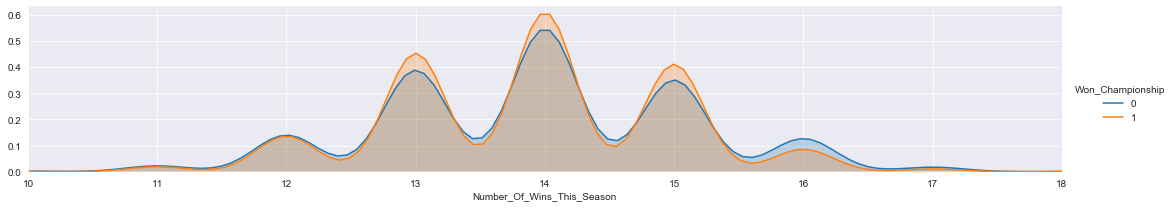

In [24]:
kdeplot('Number_Of_Wins_This_Season')

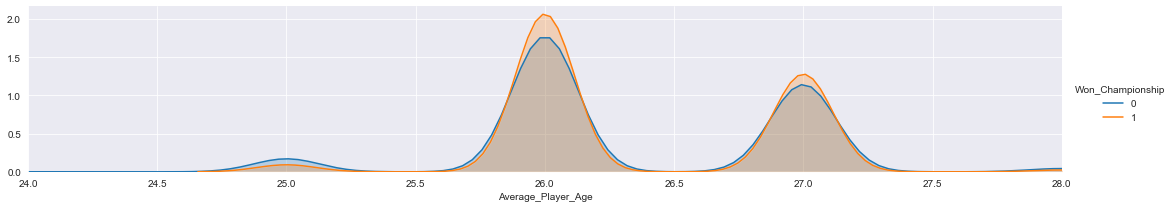

In [25]:
kdeplot('Average_Player_Age')

In [26]:
train.columns

Index(['Won_Championship', 'Previous_SB_Wins', 'Number_Of_Wins_This_Season',
       'Number_Of_First_Round_Draft_Picks', 'Team_Value', 'Playing_Style',
       'Average_Player_Age', 'Number_Of_Injured_Players',
       'Coach_Experience_Level', 'past_cup/current_win', 'games_left',
       'Round_Draft_class'],
      dtype='object')

In [27]:
test.dtypes

Previous_SB_Wins                      int64
Number_Of_Wins_This_Season            int64
Number_Of_First_Round_Draft_Picks     int64
Team_Value                           object
Playing_Style                        object
Average_Player_Age                    int64
Number_Of_Injured_Players            object
Coach_Experience_Level               object
past_cup/current_win                  int64
games_left                            int64
Round_Draft_class                    object
dtype: object

In [28]:
x=train.drop(['Won_Championship'], axis=1)
y=train.Won_Championship
from time import time

In [29]:
x.columns

Index(['Previous_SB_Wins', 'Number_Of_Wins_This_Season',
       'Number_Of_First_Round_Draft_Picks', 'Team_Value', 'Playing_Style',
       'Average_Player_Age', 'Number_Of_Injured_Players',
       'Coach_Experience_Level', 'past_cup/current_win', 'games_left',
       'Round_Draft_class'],
      dtype='object')

In [30]:
x.head()

,Previous_SB_Wins,Number_Of_Wins_This_Season,Number_Of_First_Round_Draft_Picks,Team_Value,Playing_Style,Average_Player_Age,Number_Of_Injured_Players,Coach_Experience_Level,past_cup/current_win,games_left,Round_Draft_class
0,3,13,2,Less_Than_Four_Billion,Balanced,27,five,Intermediate,16,19,may_win
1,2,14,2,Less_Than_Four_Billion,Aggressive_Offense,26,five,Intermediate,16,18,may_win
2,2,13,1,Less_Than_Four_Billion,Aggressive_Defense,27,four,Intermediate,15,19,may_win
3,2,12,2,Above_Four_Billion,Balanced,27,six,Intermediate,14,20,may_win
4,1,15,2,Less_Than_Four_Billion,Balanced,26,five,Intermediate,16,17,may_win


In [31]:
from catboost import Pool, CatBoostClassifier, cv

In [32]:
cate_features_index=np.where(x.dtypes != float) [0]; cate_features_index

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [35]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score
errcb=[]
y_pred_totcb=[]

from sklearn.model_selection import KFold,StratifiedKFold, TimeSeriesSplit, GroupKFold
fold=KFold(n_splits=3, shuffle=True,random_state=99)
i=1

for train_index, test_index in fold.split(x,y):
    X_train, X_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    m=CatBoostClassifier(iterations =1500, depth=8, learning_rate=0.07,eval_metric ='F1', use_best_model=True)
    m.fit(X_train,y_train,cate_features_index,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=100,verbose=100)
    preds=m.predict(X_test)
    
    print("err: ",f1_score(y_test,preds))
    errcb.append(f1_score(y_test,preds))
    p = m.predict(test)
    y_pred_totcb.append(p)

0:	learn: 0.5475487	test: 0.5485681	test1: 0.5322487	best: 0.5322487 (0)	total: 203ms	remaining: 5m 4s
100:	learn: 0.7677100	test: 0.7672866	test1: 0.7453416	best: 0.7471591 (76)	total: 2.89s	remaining: 40s
200:	learn: 0.7792941	test: 0.7720207	test1: 0.7525968	best: 0.7525968 (200)	total: 5.77s	remaining: 37.3s
300:	learn: 0.7869698	test: 0.7739822	test1: 0.7543285	best: 0.7553041 (260)	total: 9.34s	remaining: 37.2s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7553041018
bestIteration = 260

Shrink model to first 261 iterations.
err:  0.7553041018387553
0:	learn: 0.5464673	test: 0.5467331	test1: 0.5365566	best: 0.5365566 (0)	total: 37.5ms	remaining: 56.2s
100:	learn: 0.7615439	test: 0.7684162	test1: 0.7676768	best: 0.7679634 (53)	total: 2.5s	remaining: 34.7s
200:	learn: 0.7722866	test: 0.7724868	test1: 0.7680294	best: 0.7699358 (152)	total: 5.83s	remaining: 37.7s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7699358387
bestIteration = 152

In [36]:
pred =np.mean(y_pred_totcb,0)

In [37]:
testx =pd.read_csv('test.csv')

In [38]:
xfinal =pd.DataFrame({'ID': testx['ID']})
yfinal = pd.DataFrame ({'Won_Championship' :pred})

In [39]:
yfinal['Won_Championship'].value_counts()

0.000000    1623
1.000000    1611
0.333333     151
0.666667     115
Name: Won_Championship, dtype: int64

In [40]:
submission =pd.concat([xfinal, yfinal], axis ='columns')

In [41]:
def threshold(x):
    if x >= 0.24:
        return 1
    else:
        return 0
submission['Won_Championship'] = submission['Won_Championship'].apply(threshold)
newxy =submission[['Won_Championship','Won_Championship']]

In [42]:
submission['Won_Championship'].value_counts()

1    1877
0    1623
Name: Won_Championship, dtype: int64

In [43]:
submission.to_csv('20j.csv', index =False)#submit 20j kfold work if no improvement remove learning rate

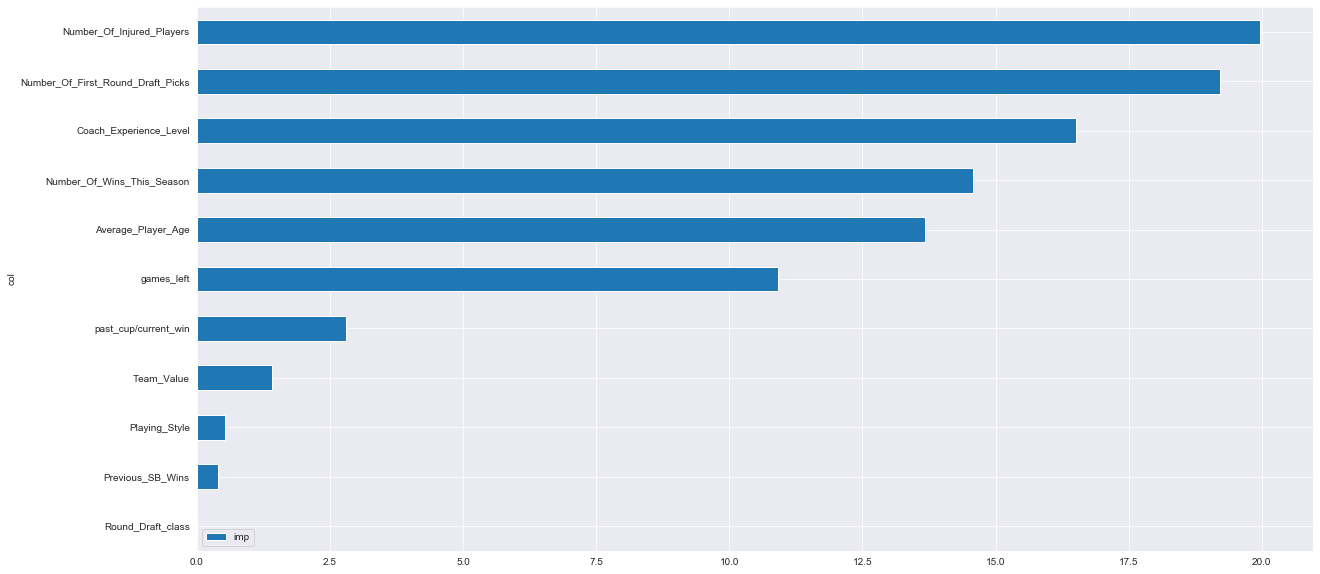

In [44]:
fea_imp = pd.DataFrame({'imp':m.feature_importances_, 'col': x.columns})
fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
_ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 10))
#plt.savefig('catboost_feature_importance.png')  